# 01 텐서(tensor)

- 텐서는 `numpy ndarray` 와 유사하다. 
텐서는 GPU 연산을 빠르게 하기위해 array에 다른것들이 추가된 object이다.




- 초기화하지 않는 텐서(empty tensor)를 선언하면, 쓰레기값이 들어있다. 

  `torch.empty()`

In [3]:
import torch 
print(torch.__version__)

# 5x3 empty tensor 선언 
x = torch.empty(5, 3)
print(x)

1.6.0+cu101
tensor([[2.2439e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 1.6255e-43],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 8.4845e-36]])


- 일정 범위 내에서 무작위 초기값을 줄 수도 있다. 

   `torch.rand() `

In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7819, 0.0437, 0.8268],
        [0.4264, 0.5658, 0.1569],
        [0.3001, 0.5390, 0.4305],
        [0.8866, 0.8717, 0.8832],
        [0.7402, 0.4188, 0.6983]])


- zero tensor는 0으로 초기화된 텐서이다. 

  `torch.zeros()`

In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


- 이미 존재하는 데이터 array 로부터 tensor를 생성할 수도 있다. 

In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


- 또는, 존재하는 tensor 로부터 tensor를 생성할 수도 있다. 
  
  이 방법은 참조하는 tensor의 data type같은 property들을 그대로 계승한다. 

- `torch.tensor`는 항상 data 만 copy한다. (deep copy)

 ` detach()`로 복사할 시에 `requires_grad` flag는 복사되지 않는다. 

  기본값인 False로 복사된다.
   

In [39]:
x = torch.rand(5, 3)
x.requires_grad = True
print("원본 텐서")
print(x)
print("dtype : ", x.dtype)
print("require_grad", x.requires_grad)

y = x.detach()   
print("\n복사된 텐서")
print(y)
print("dtype : ", y.dtype)
print("require_grad", y.requires_grad)

원본 텐서
tensor([[0.6112, 0.2860, 0.8745],
        [0.0068, 0.7502, 0.9342],
        [0.4143, 0.9507, 0.8185],
        [0.0198, 0.2933, 0.0697],
        [0.8812, 0.8780, 0.2801]], requires_grad=True)
dtype :  torch.float32
require_grad True

복사된 텐서
tensor([[0.6112, 0.2860, 0.8745],
        [0.0068, 0.7502, 0.9342],
        [0.4143, 0.9507, 0.8185],
        [0.0198, 0.2933, 0.0697],
        [0.8812, 0.8780, 0.2801]])
dtype :  torch.float32
require_grad False


- numpy 데이터로부터의 tensor 생성은 `torch.as_tensor()`로 한다. 
  
  이때, 생성된 tensor 의 dtype는 원본 numpy array의 dtype와 동일하다.

In [41]:
import numpy as np

print("원본 numpy array")
array = np.zeros([3,4],dtype=np.int16)
print(array)
print("dtype : ", array.dtype)

print("\n복사된 tensor")
x = torch.as_tensor(array)
print(x)
print("dtype : ", x.dtype)


원본 numpy array
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
dtype :  int16

복사된 tensor
tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int16)
dtype :  torch.int16
tensor([[ 0.1210, -0.6545,  2.3995, -1.3764],
        [ 0.5986,  0.4633,  0.2493,  0.7688],
        [ 0.6259, -0.2294,  0.5746, -0.2345]])


- 존재하는 tensor의 shape만을 그대로 하여 복사할 수도 있다.

  이때 dtype를 재지정 가능하다.

  랜덤 초기값일 때는 `torch.rand_like()`를 사용한다.
  
  복사시 타입 지정도 가능하다.

In [45]:
x = torch.zeros(5, 3, dtype=torch.float32)
print(x)
x = torch.randn_like(x, dtype=torch.float64)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[ 3.2107, -1.0937, -0.4493],
        [ 2.7068,  0.2336, -0.8580],
        [ 0.1693, -0.4378, -0.0177],
        [-0.9983, -1.5644,  0.1572],
        [-0.9003,  0.5317,  1.3656]], dtype=torch.float64)


- 많이 쓰는 기능중 하나, tensor의 shape을 보고 싶을때는 이렇게 한다.

  `torch.size()` 는 메소드 이기에 callable 하며, python tuple을 리턴한다. 

   `torch.shape`로 속성으로 가져올 수도 있다.

  때문에 tuple 연산도 먹힌다. 

In [55]:
print(x.size())
print(type(x.size()))
print(x.shape)
print(type(x.shape))

# index로 접근 가능하다.
print(x.size(0))
print(x.size(1))
print(x.size(-1))
print(x.size(-2))

torch.Size([5, 3])
<class 'torch.Size'>
torch.Size([5, 3])
<class 'torch.Size'>
5
3
3
5


# 02 텐서 연산(tensor operation)

- 텐서 덧셈은 일반적인 numpy array에서와 동일하다. 
  
  `torch.add` 메소드도 사용 가능하다. 

In [59]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x)
print(y)
print(x + y)
print(torch.add(x,y))


tensor([[0.6746, 0.0092, 0.8682],
        [0.8074, 0.7882, 0.5122],
        [0.0677, 0.4975, 0.2445],
        [0.7842, 0.5493, 0.8065],
        [0.8517, 0.6436, 0.0990]])
tensor([[0.2712, 0.0514, 0.5063],
        [0.6002, 0.3899, 0.4782],
        [0.2084, 0.7761, 0.5595],
        [0.0015, 0.9287, 0.9576],
        [0.4556, 0.3830, 0.1505]])
tensor([[0.9458, 0.0606, 1.3745],
        [1.4077, 1.1782, 0.9904],
        [0.2760, 1.2737, 0.8040],
        [0.7857, 1.4780, 1.7641],
        [1.3074, 1.0267, 0.2495]])
tensor([[0.9458, 0.0606, 1.3745],
        [1.4077, 1.1782, 0.9904],
        [0.2760, 1.2737, 0.8040],
        [0.7857, 1.4780, 1.7641],
        [1.3074, 1.0267, 0.2495]])


- 텐서 뺄셈은 일반적인 numpy array에서와 동일하다.

  `torch.sub` 메소드도 사용 가능하다. 

In [63]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x)
print(y)
print(x - y)
print(torch.sub(x,y))

tensor([[0.1139, 0.4161, 0.2404],
        [0.5581, 0.4795, 0.5024],
        [0.0541, 0.1892, 0.3181],
        [0.3345, 0.7490, 0.7787],
        [0.7382, 0.5958, 0.3403]])
tensor([[0.9863, 0.0647, 0.5889],
        [0.9977, 0.4372, 0.3532],
        [0.9359, 0.3198, 0.1633],
        [0.7694, 0.6494, 0.3090],
        [0.7604, 0.4400, 0.4983]])
tensor([[-0.8723,  0.3514, -0.3484],
        [-0.4395,  0.0423,  0.1492],
        [-0.8817, -0.1306,  0.1548],
        [-0.4348,  0.0995,  0.4697],
        [-0.0222,  0.1558, -0.1580]])
tensor([[-0.8723,  0.3514, -0.3484],
        [-0.4395,  0.0423,  0.1492],
        [-0.8817, -0.1306,  0.1548],
        [-0.4348,  0.0995,  0.4697],
        [-0.0222,  0.1558, -0.1580]])


- 텐서 reshape 를 하는 방법 몇가지가 있다. 
 
  reshape도 많이 사용하기 때문에 잘 알아야 한다. 

  둘다 shallow copy임에 유의.

  1. `torch.view()`  : reshape된 새로운 tensor 반환, 원본 텐서와 data 공유

        continuous tensor 에서만 가능

  2. `torch.reshape()` : reshape된 새로운 tensor 반환, 원본 텐서와 data 공유 

        continuous, non-continous tensor 에서 모두 가능 

https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch


- continuous tensor vs non-continous tensor 

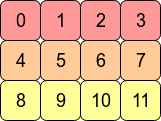

    continuous array는 연속된 메모리 공간에 연속적으로 할당된 배열일 경우.

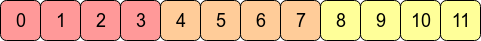
    
    메모리 할당공간의 인덱스와 데이터의 인덱스가 동일하다. 

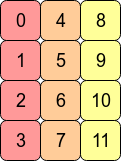

    non-continous array는 할당된 메모리 공간과 데이터의 인덱스가 다른경우

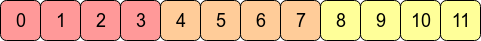

In [92]:
x = torch.rand(2,2)
y = x.view(4,) 
print(x)
print(y)
print(x.shape, y.shape)
y = x.reshape(4,) 
print(x)
print(y)
print(x.shape, y.shape)
## 연산결과는 동일해 보인다. 하지만?


tensor([[0.6519, 0.0645],
        [0.2105, 0.5340]])
tensor([0.6519, 0.0645, 0.2105, 0.5340])
torch.Size([2, 2]) torch.Size([4])
tensor([[0.6519, 0.0645],
        [0.2105, 0.5340]])
tensor([0.6519, 0.0645, 0.2105, 0.5340])
torch.Size([2, 2]) torch.Size([4])
tensor([[0., 0.],
        [0., 0.]])
tensor([0., 0., 0., 0.])
140265761478480 140267172479408


In [93]:
for i in range(len(y)):
  y[i] = 0
print(x)
print(y)
## reshape는 shallow copy 이기 때문에, x도 함께 바뀐다. 
## id 는 다르지만, data를 공유한다. 
print(id(x),id(y))

tensor([[0., 0.],
        [0., 0.]])
tensor([0., 0., 0., 0.])
140265761478480 140267172479408


In [94]:
x = torch.rand(2,2)
y = x.view(4,) 
for i in range(len(y)):
  y[i] = 0
print(x)
print(y)
print(x.shape, y.shape)

tensor([[0., 0.],
        [0., 0.]])
tensor([0., 0., 0., 0.])
torch.Size([2, 2]) torch.Size([4])


# 03 텐서의 Deep copy, Shallow copy

- 텐서 객체를 복사할 때 shallow copy 인지 deep copy 인지 확인해야 한다. 

In [80]:
## shallow copy
x = torch.rand(5,3)
print(x)
y = x
print(y)
print(id(x), id(y))
print(x.requires_grad,y.requires_grad)
y.copy_(x)
print(y)
print(id(x), id(y))
print(x.requires_grad,y.requires_grad)
## deep copy
x.requires_grad=True
y = x.detach()
print(y)
print(id(x), id(y))
print(x.requires_grad,y.requires_grad)

tensor([[0.3639, 0.1402, 0.0895],
        [0.3067, 0.1039, 0.3856],
        [0.6374, 0.6134, 0.9177],
        [0.9680, 0.0585, 0.4951],
        [0.8953, 0.1833, 0.9700]])
tensor([[0.3639, 0.1402, 0.0895],
        [0.3067, 0.1039, 0.3856],
        [0.6374, 0.6134, 0.9177],
        [0.9680, 0.0585, 0.4951],
        [0.8953, 0.1833, 0.9700]])
140265761445424 140265761445424
False False
tensor([[0.3639, 0.1402, 0.0895],
        [0.3067, 0.1039, 0.3856],
        [0.6374, 0.6134, 0.9177],
        [0.9680, 0.0585, 0.4951],
        [0.8953, 0.1833, 0.9700]])
140265761445424 140265761445424
False False
tensor([[0.3639, 0.1402, 0.0895],
        [0.3067, 0.1039, 0.3856],
        [0.6374, 0.6134, 0.9177],
        [0.9680, 0.0585, 0.4951],
        [0.8953, 0.1833, 0.9700]])
140265761445424 140265762010744
True False
